In [2]:
# Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading and reading data
file_path=r"C:\projects\dataset\regression-one.csv"
data=pd.read_csv(file_path)
df=pd.DataFrame(data)

In [4]:
# Set display option
pd.set_option("display.max_columns", None)

#### Dataset Overview and Inspectation

In [5]:
# Reading the first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# Getting the dataframe shape
print(f"Dataframe shape(rows, columns): {df.shape}")

Dataframe shape(rows, columns): (2938, 22)


In [7]:
# Getting the dataframe basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Standardization the dataframe column names
df.columns=df.columns.str.lower().str.replace(" ", "_")

In [9]:
# Getting column names
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [10]:
# Changing data types
df["year"]=df["year"].astype("str")

In [11]:
def identify_dtypes(df):
    """Identify and group columns by their data types."""
    cat_cols   = df.select_dtypes(include=["object", "category"]).columns
    num_cols   = df.select_dtypes(include=["int64", "float64"]).columns
    
    print(f"Categorical columns: {len(list(cat_cols))}\n", list(cat_cols))
    print("="*50)
    print(f"Integer columns:{len(list(num_cols))}\n", list(num_cols))
    print("="*150)

identify_dtypes(df)

Categorical columns: 3
 ['country', 'year', 'status']
Integer columns:19
 ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [12]:
# Missing Columns
null_cols = df.columns[df.isna().any()]
print(f"Number of columns having any missing values: {len(null_cols)}\n")
print(f"Contained Null Values: \n{null_cols}\n")

Number of columns having any missing values: 14

Contained Null Values: 
Index(['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi',
       'polio', 'total_expenditure', 'diphtheria', 'gdp', 'population',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')



In [13]:
# Missing Values Analysis
missing_count = df.isna().sum()
missing_pct = df.isna().mean().mul(100).round(4)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_pct})
print("Missing Values Summary: ")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by= 'Missing Count', ascending=False))

Missing Values Summary: 
                                 Missing Count  Missing Percentage
population                                 652             22.1920
hepatitis_b                                553             18.8223
gdp                                        448             15.2485
total_expenditure                          226              7.6923
alcohol                                    194              6.6031
income_composition_of_resources            167              5.6841
schooling                                  163              5.5480
thinness_5-9_years                          34              1.1572
thinness_1-19_years                         34              1.1572
bmi                                         34              1.1572
polio                                       19              0.6467
diphtheria                                  19              0.6467
life_expectancy                             10              0.3404
adult_mortality                      

In [14]:
# Checking duplicates
print(f"Number of duplicated records: {df.duplicated().sum()}")

Number of duplicated records: 0


In [15]:
# Function to detect outliers for all numeric columns using IQR
def detect_outliers_all(dataframe):
    """
    Detect outliers for all numeric columns in a DataFrame using the IQR method.
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
    Returns:
        outlier_summary (dict): Dictionary with column names as keys and number of outliers as values.
        outlier_details (dict): Dictionary with column names as keys and DataFrame of outliers as values.
    """
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    outlier_summary = {}
    outlier_details = {}

    for col in numeric_columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outlier_summary[col] = outliers.shape[0]
        outlier_details[col] = outliers

        # Print details only if outliers exist
        if outliers.shape[0] > 0:
            print(f"{col}: ")
            print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
            print(f"  Number of Outliers: {outliers.shape[0]}")
            print("-" * 50)

    return outlier_summary, outlier_details

# Example usage
outlier_counts, outlier_data = detect_outliers_all(df)

life_expectancy: 
  Lower Bound: 44.20, Upper Bound: 94.60
  Number of Outliers: 10
--------------------------------------------------
adult_mortality: 
  Lower Bound: -157.00, Upper Bound: 459.00
  Number of Outliers: 82
--------------------------------------------------
infant_deaths: 
  Lower Bound: -33.00, Upper Bound: 55.00
  Number of Outliers: 315
--------------------------------------------------
percentage_expenditure: 
  Lower Bound: -650.59, Upper Bound: 1096.81
  Number of Outliers: 389
--------------------------------------------------
hepatitis_b: 
  Lower Bound: 47.00, Upper Bound: 127.00
  Number of Outliers: 254
--------------------------------------------------
measles: 
  Lower Bound: -540.38, Upper Bound: 900.62
  Number of Outliers: 542
--------------------------------------------------
under-five_deaths: 
  Lower Bound: -42.00, Upper Bound: 70.00
  Number of Outliers: 394
--------------------------------------------------
polio: 
  Lower Bound: 49.50, Upper Bound:

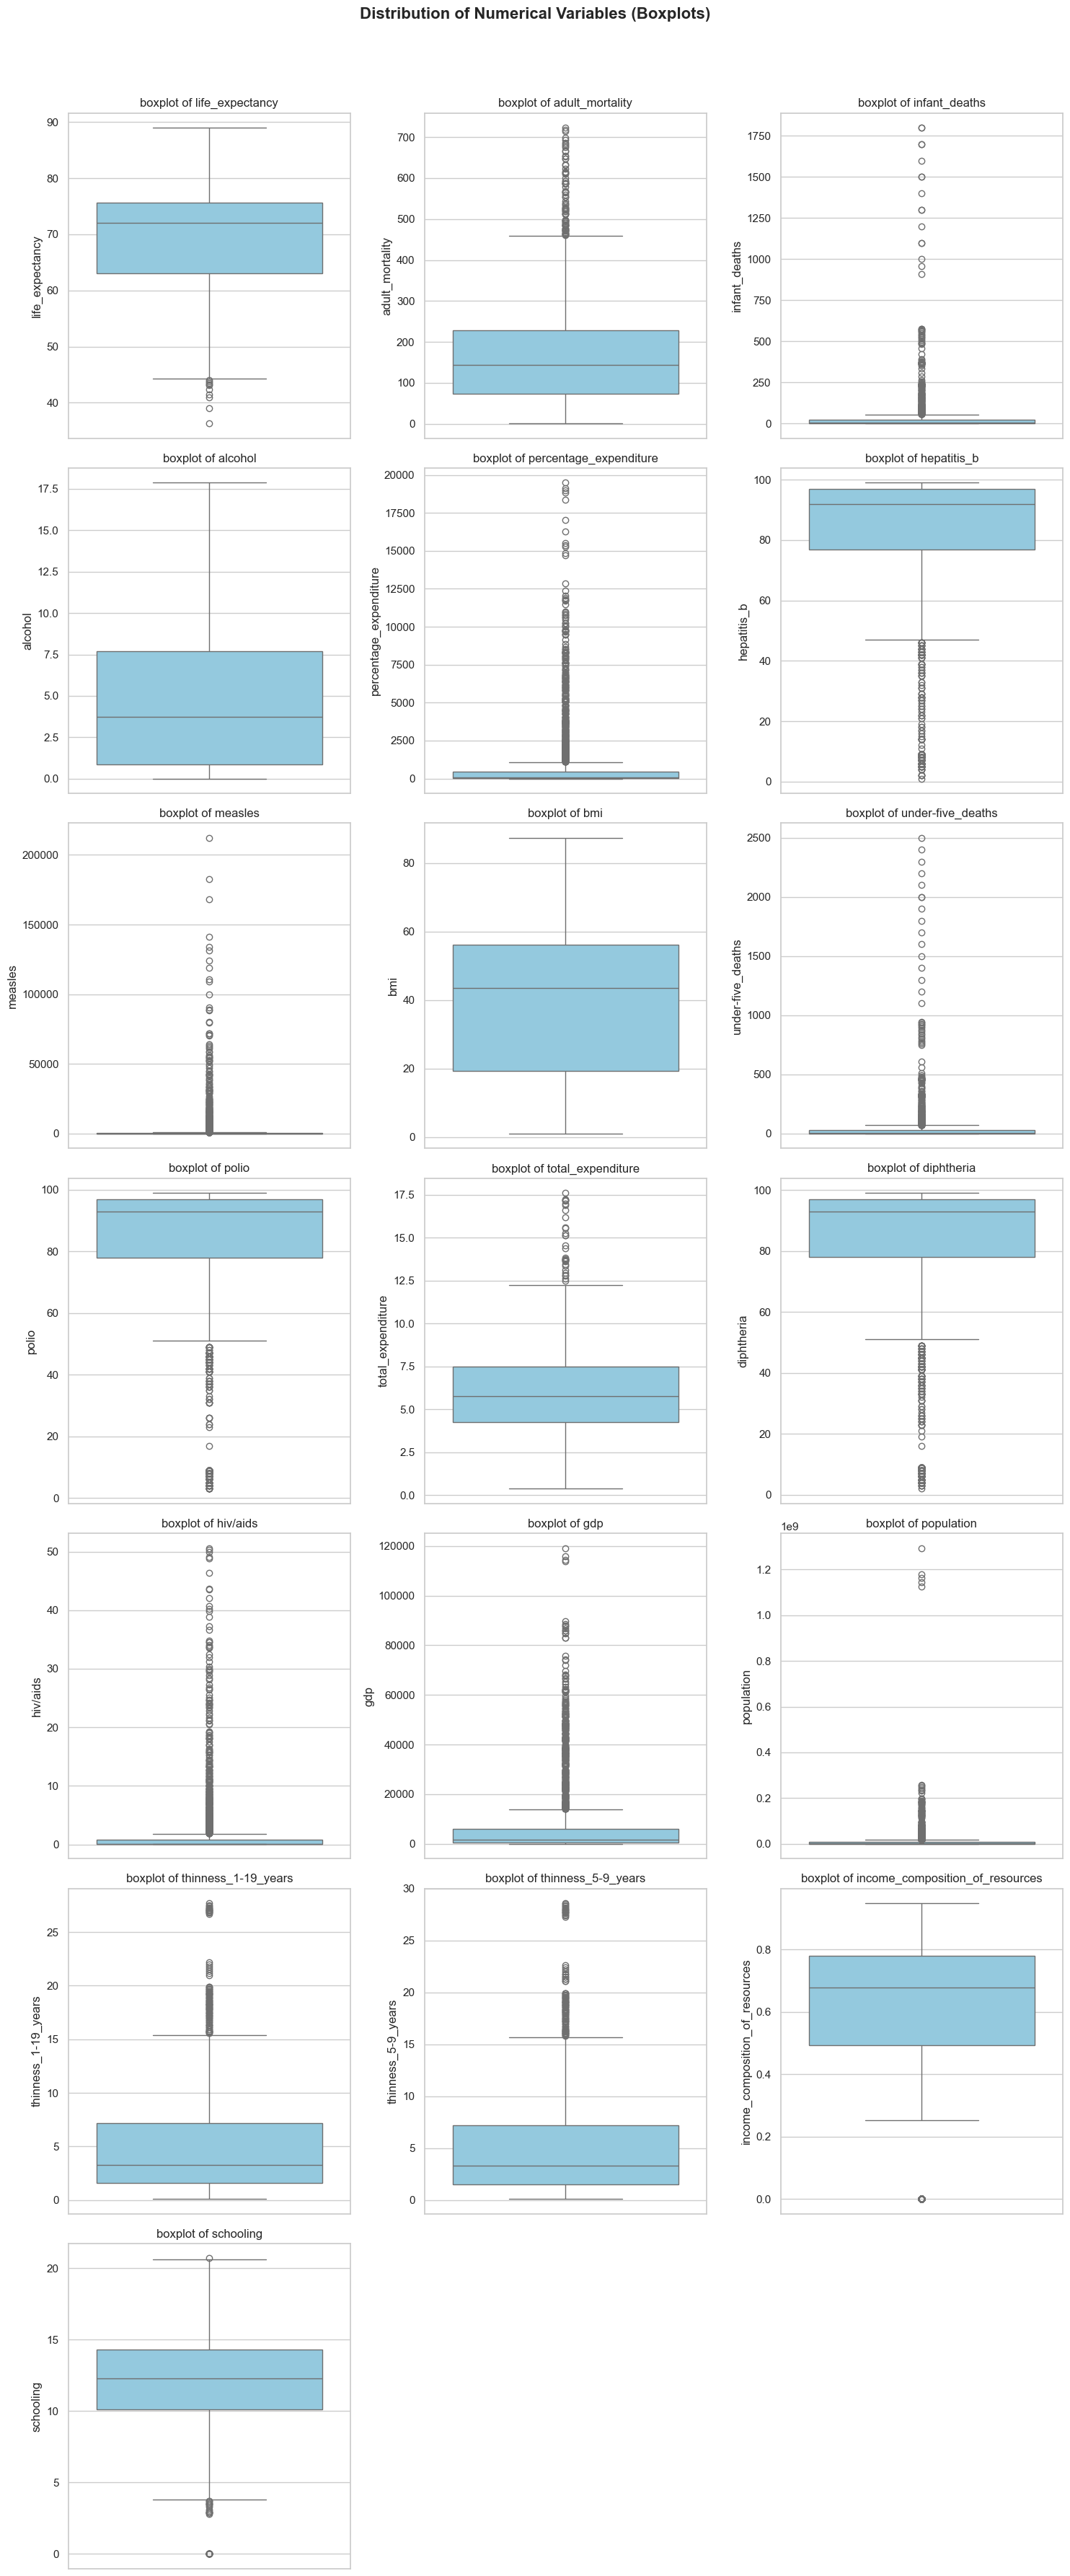

In [16]:
sns.set(style="whitegrid")
def plot_box(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    num_plots = len(num_cols)
    num_cols_plots = 3  
    num_rows_plots = (num_plots // num_cols_plots) + (num_plots % num_cols_plots > 0)
    
    fig, axes = plt.subplots(num_rows_plots, num_cols_plots, figsize=(15, num_rows_plots * 5))
    axes = axes.flatten()  

    for i, col in enumerate(num_cols):
        sns.boxplot(df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f'boxplot of {col}')

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    # Add main title
    fig.suptitle("Distribution of Numerical Variables (Boxplots)", fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

plot_box(df)

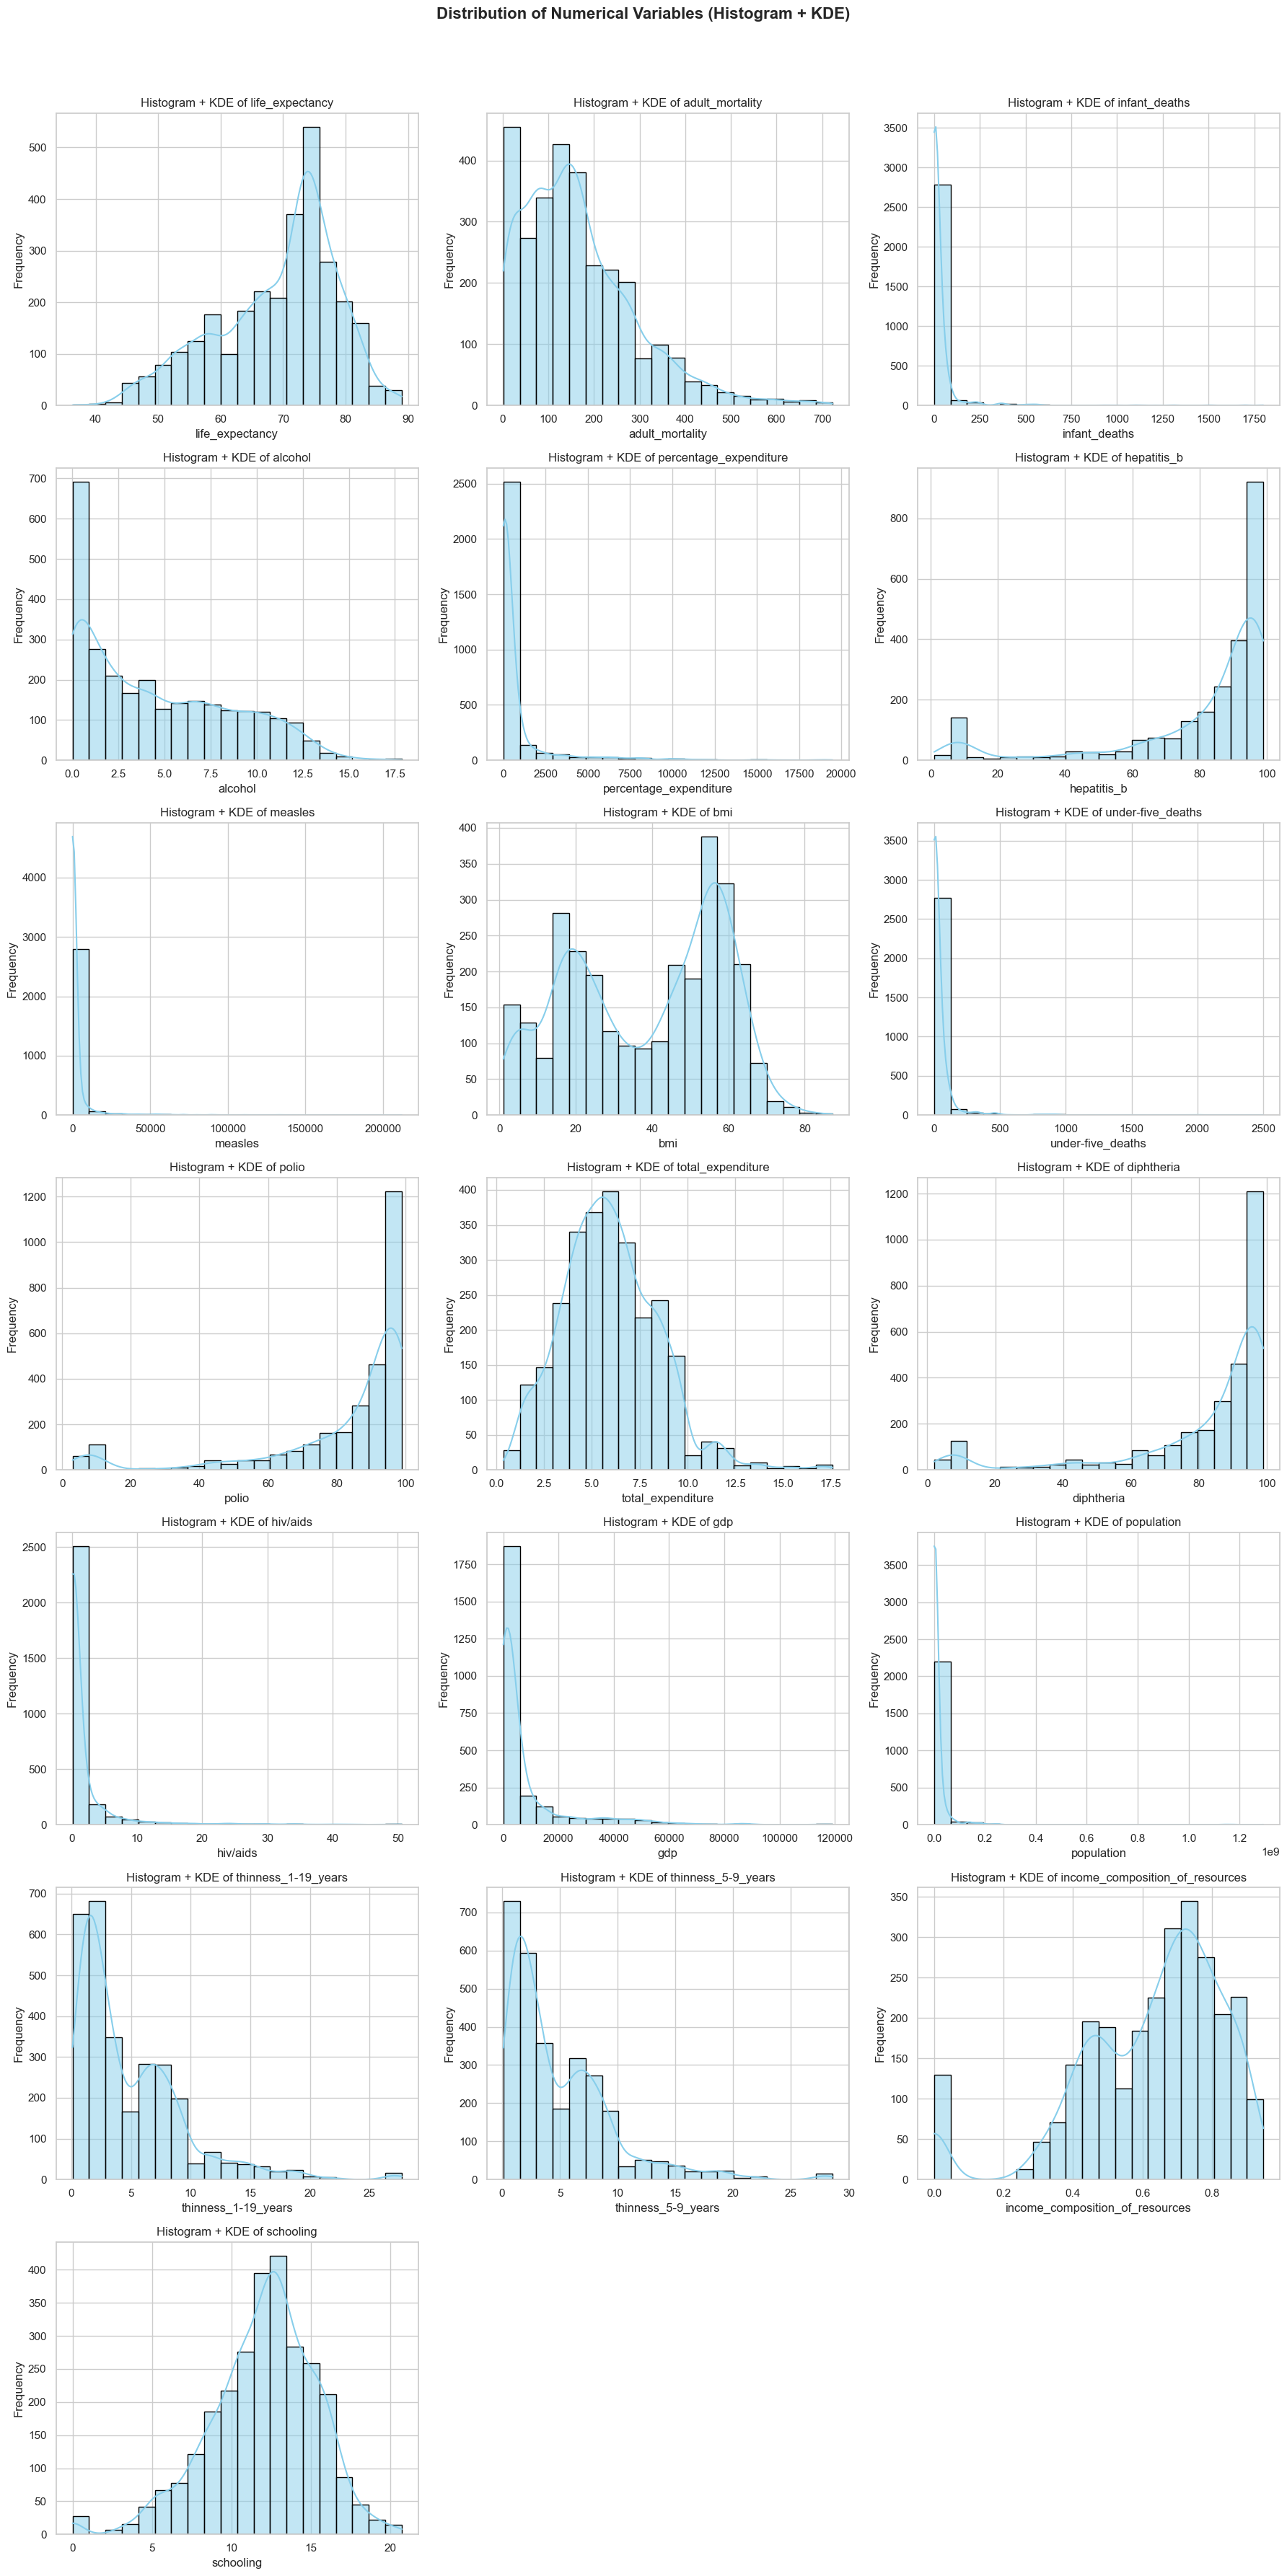

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include='number').columns
n_cols = len(num_cols)

# Determine subplot grid size
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # 3 plots per row

# Create figure and axes
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Histogram + KDE of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add main title
fig.suptitle("Distribution of Numerical Variables (Histogram + KDE)", fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Data Cleaning

In [18]:
# Removing null values record
df_cleaned=df.copy()
df_cleaned.dropna(axis=0, inplace=True)

In [19]:
# Checking is there any missing values
print(f"Total missing values: {df_cleaned.isna().sum().sum()}")

Total missing values: 0


In [20]:
def cap_outliers_iqr(df, factor=1.5):
    df_capped = df.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        df_capped[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df_capped

In [21]:
df_cleaned = cap_outliers_iqr(df_cleaned)
display(df_cleaned.head())  # or display(df_capped)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,53.5,0.01,71.279624,65.0,932.5,19.1,71.0,57.0,8.16,65.0,0.1,584.259210,18859584.5,15.35,15.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,53.5,0.01,73.523582,62.0,492.0,18.6,71.0,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.2,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,53.5,0.01,73.219243,64.0,430.0,18.1,71.0,62.0,8.13,64.0,0.1,631.744976,18859584.5,15.35,15.2,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,53.5,0.01,78.184215,67.0,932.5,17.6,71.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.2,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,53.5,0.01,7.097109,68.0,932.5,17.2,71.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.2,0.454,9.5


#### Exploratory Data Analysis

In [22]:
df_cleaned.select_dtypes(include="number").describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
life_expectancy,1649.00,69.36,8.66,48.50,64.40,71.70,75.00,89.00
adult_mortality,1649.00,164.47,113.65,1.00,77.00,148.00,227.00,452.00
infant_deaths,1649.00,13.77,18.78,0.00,1.00,3.00,22.00,53.50
alcohol,1649.00,4.53,4.03,0.01,0.81,3.79,7.34,17.13
percentage_expenditure,1649.00,338.70,406.80,0.00,37.44,145.10,509.39,1217.32
hepatitis_b,1649.00,82.02,18.57,41.00,74.00,89.00,96.00,99.00
measles,1649.00,240.05,365.98,0.00,0.00,15.00,373.00,932.50
bmi,1649.00,38.13,19.75,2.00,19.50,43.70,55.80,77.10
under-five_deaths,1649.00,18.42,25.50,0.00,1.00,4.00,29.00,71.00
polio,1649.00,86.79,13.17,57.00,81.00,93.00,97.00,99.00


In [23]:
# Checking the correlation between numerical variables
df_cleaned.select_dtypes(include="number").corr(method="pearson")

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.694600,-0.519834,0.407475,0.546822,0.249832,-0.251444,0.545852,-0.552345,0.441517,0.180626,0.458463,-0.767444,0.535270,-0.054197,-0.506537,-0.511770,0.774817,0.735394
adult_mortality,-0.694600,1.000000,0.330328,-0.187508,-0.315674,-0.138991,0.167127,-0.367143,0.353187,-0.277566,-0.103592,-0.280448,0.593851,-0.309222,0.065670,0.324247,0.342473,-0.489220,-0.446453
infant_deaths,-0.519834,0.330328,1.000000,-0.290471,-0.346997,-0.270737,0.552571,-0.455060,0.995443,-0.400282,-0.178205,-0.401047,0.370737,-0.328103,0.429622,0.409706,0.429052,-0.434285,-0.516775
alcohol,0.407475,-0.187508,-0.290471,1.000000,0.516712,0.134378,-0.143732,0.353421,-0.295125,0.305019,0.217650,0.326379,-0.185619,0.530194,0.008942,-0.424615,-0.408925,0.587226,0.617938
percentage_expenditure,0.546822,-0.315674,-0.346997,0.516712,1.000000,0.111664,-0.191170,0.373233,-0.356276,0.251201,0.265625,0.262547,-0.317627,0.906642,-0.031419,-0.376940,-0.378561,0.583789,0.602479
hepatitis_b,0.249832,-0.138991,-0.270737,0.134378,0.111664,1.000000,-0.240885,0.170958,-0.278061,0.617774,0.129035,0.680141,-0.225783,0.146285,-0.111495,-0.126131,-0.131314,0.248216,0.269734
measles,-0.251444,0.167127,0.552571,-0.143732,-0.191170,-0.240885,1.000000,-0.267623,0.545947,-0.251925,-0.159716,-0.254425,0.132913,-0.172537,0.312701,0.325035,0.329420,-0.193807,-0.272110
bmi,0.545852,-0.367143,-0.455060,0.353421,0.373233,0.170958,-0.267623,1.000000,-0.476600,0.241347,0.190785,0.242734,-0.439911,0.387433,-0.078714,-0.577320,-0.588395,0.543835,0.556824
under-five_deaths,-0.552345,0.353187,0.995443,-0.295125,-0.356276,-0.278061,0.545947,-0.476600,1.000000,-0.414110,-0.179296,-0.413362,0.408845,-0.340994,0.415009,0.422832,0.441183,-0.460319,-0.538014
polio,0.441517,-0.277566,-0.400282,0.305019,0.251201,0.617774,-0.251925,0.241347,-0.414110,1.000000,0.149348,0.852992,-0.352069,0.277957,-0.083952,-0.220872,-0.227526,0.442264,0.451758


In [24]:
# Checking the correlation between "life-expectancy" and others numerical variables
df_cleaned.select_dtypes(include="number").corr(method="pearson")["life_expectancy"].sort_values(ascending=False)

life_expectancy                    1.000000
income_composition_of_resources    0.774817
schooling                          0.735394
percentage_expenditure             0.546822
bmi                                0.545852
gdp                                0.535270
diphtheria                         0.458463
polio                              0.441517
alcohol                            0.407475
hepatitis_b                        0.249832
total_expenditure                  0.180626
population                        -0.054197
measles                           -0.251444
thinness_1-19_years               -0.506537
thinness_5-9_years                -0.511770
infant_deaths                     -0.519834
under-five_deaths                 -0.552345
adult_mortality                   -0.694600
hiv/aids                          -0.767444
Name: life_expectancy, dtype: float64

#### Simple Linear Regression

In [25]:
# Setting dependent and independent variable
X=df_cleaned["income_composition_of_resources"]
y=df_cleaned["life_expectancy"]

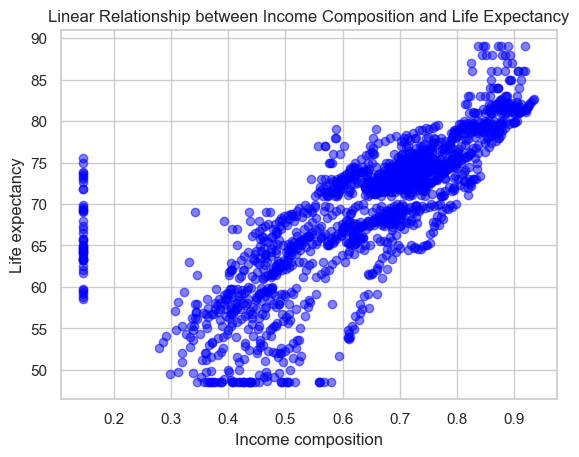

In [26]:
# Checking for Linearity
plt.scatter(X, y, marker="o", color= "blue", alpha=0.5)
plt.title("Linear Relationship between Income Composition and Life Expectancy")
plt.xlabel("Income composition")
plt.ylabel("Life expectancy")
plt.show()

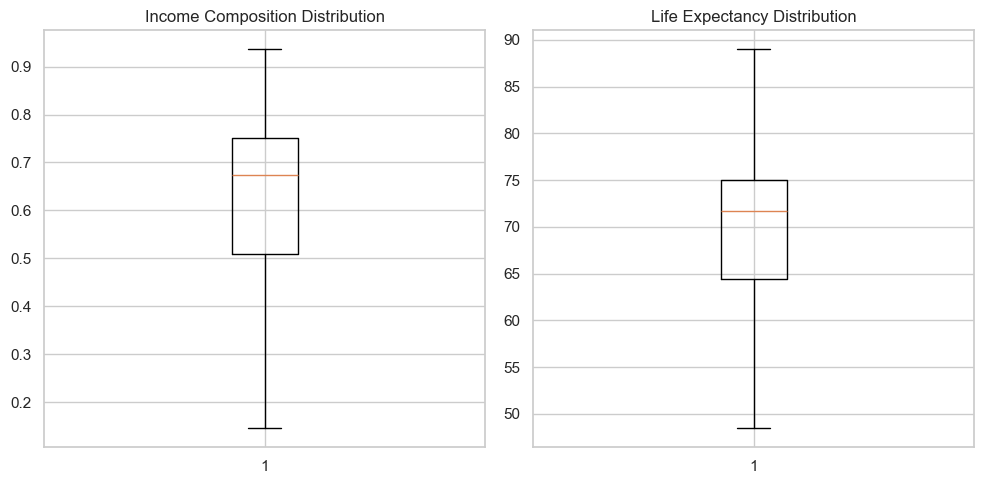

In [28]:
# Checking for outliers
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].boxplot(X)
ax[0].set_title("Income Composition Distribution")
ax[1].boxplot(y)
ax[1].set_title("Life Expectancy Distribution")
plt.tight_layout()
plt.show()

In [27]:
# Computing pearson's correlation coefficient
import scipy.stats as sc
r = sc.pearsonr(X, y)
print(f"Pearson r = {r[0]:.4f} with p-value = {r[1]:.4f}")

Pearson r = 0.7748 with p-value = 0.0000


In [29]:
# Fitting the regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\n --- Regression Model Summary ---")
print(model.summary())


 --- Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     2474.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:37:50   Log-Likelihood:                -5143.1
No. Observations:                1649   AIC:                         1.029e+04
Df Residuals:                    1647   BIC:                         1.030e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [30]:
# Model ရဲ့ Parameters များကို ထုတ်ယူခြင်း
intercept = model.params['const']
slope = model.params['income_composition_of_resources']

print(f"\n--- Model အဓိပ္ပာယ်ဖွင့်ဆိုချက် ---\n")
print(f"Regression ဖော်မြူလာ: Life Expectancy = {intercept:.2f} + {slope:.2f} * ICOR")

# Slope ကို ရှင်းပြခြင်း
print(f"Slope ({slope:.2f}): ICOR တန်ဖိုး 1 (ဥပမာ 0.5 မှ 1.5 သို့) တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် {slope:.2f} နှစ် တိုးလာမည်။")
# ပိုလက်တွေ့ကျစေရန်
print(f"ICOR တန်ဖိုး 0.1 တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် {slope/10:.2f} နှစ် တိုးလာမည်။")

# ခန့်မှန်းမှု ဥပမာ: ICOR = 0.75 ရှိတဲ့ နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်းချက်
icor_new = 0.75
new_X = pd.DataFrame({'const': [1], 'Income composition of resources': [icor_new]}) 
predicted_life_exp = model.predict(new_X)[0]

print(f"\nICOR တန်ဖိုး {icor_new} ရှိသော နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်း Life Expectancy: {predicted_life_exp:.2f} နှစ်")


--- Model အဓိပ္ပာယ်ဖွင့်ဆိုချက် ---

Regression ဖော်မြူလာ: Life Expectancy = 44.19 + 39.58 * ICOR
Slope (39.58): ICOR တန်ဖိုး 1 (ဥပမာ 0.5 မှ 1.5 သို့) တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် 39.58 နှစ် တိုးလာမည်။
ICOR တန်ဖိုး 0.1 တိုးလာပါက ခန့်မှန်းသက်တမ်းဟာ ပျမ်းမျှအားဖြင့် 3.96 နှစ် တိုးလာမည်။

ICOR တန်ဖိုး 0.75 ရှိသော နိုင်ငံတစ်နိုင်ငံအတွက် ခန့်မှန်း Life Expectancy: 73.87 နှစ်


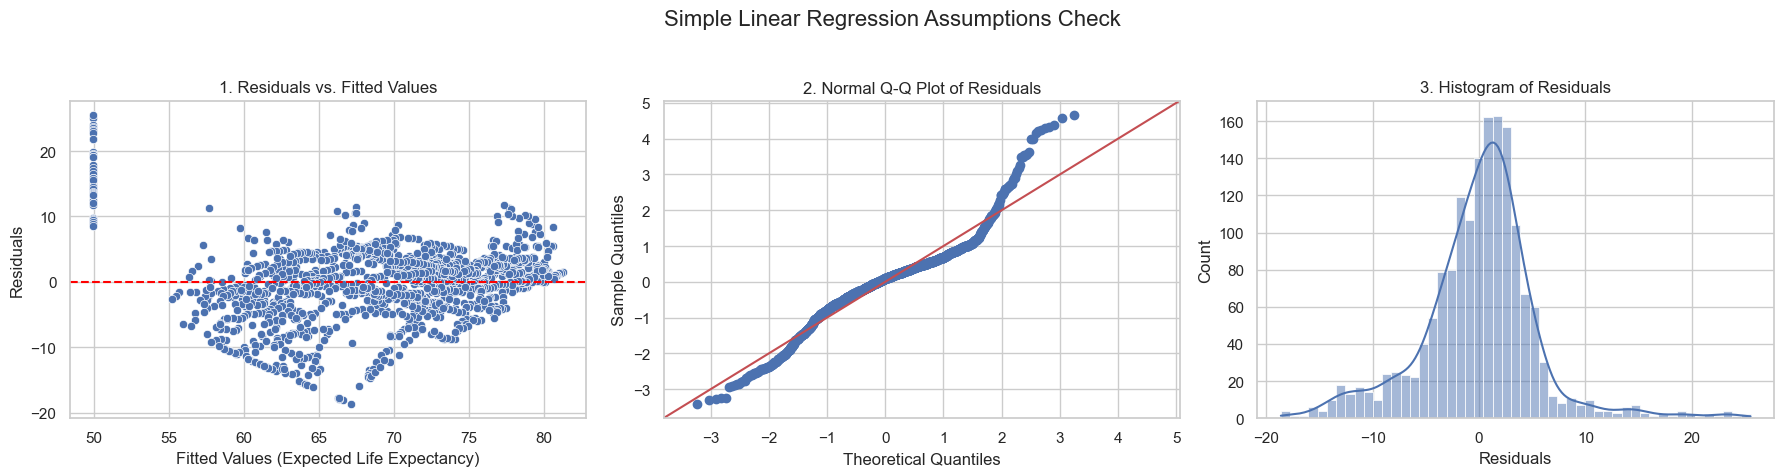

In [31]:
# Model ရဲ့ Residuals များကို ထုတ်ယူခြင်း
residuals = model.resid
fitted_values = model.fittedvalues

# ပုံများအတွက် နေရာပြင်ဆင်ခြင်း
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Simple Linear Regression Assumptions Check', fontsize=16)

# --------------------------------------------------------
# Linearity နှင့် Homoscedasticity စစ်ဆေးခြင်း
# Residuals vs. Fitted Values Plot
# ----------------------------------------
sns.scatterplot(x=fitted_values, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('1. Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values (Expected Life Expectancy)')
axes[0].set_ylabel('Residuals')

# --------------------------------------------------------
# Normality of Residuals စစ်ဆေးခြင်း
# Q-Q Plot (Quantile-Quantile Plot)
# ---------------------------------
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('2. Normal Q-Q Plot of Residuals')

# --------------------------------------------------------
# Normality of Residuals စစ်ဆေးခြင်း
# Histogram
# --------------------------------
sns.histplot(residuals, kde=True, ax=axes[2])
axes[2].set_title('3. Histogram of Residuals')
axes[2].set_xlabel('Residuals')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()